# Bernstein Polynomials

##### Setup:
Before solving any problems, I will write all of my setup code here, for use in the rest of the notebook.

In [26]:
from matplotlib import pyplot as plt
import numpy as np

___

## Problem 1:
Let $V$ be a vector space. Prove that a norm ${\left\lVert\cdot\right\rVert}$ on $V$ defines a continuous function ${\left\lVert\cdot\right\rVert}: V \rightarrow [0,\infty)$

##### Solution:
By *Lemma 1* on page 19, we have that if ${\left\lVert\cdot\right\rVert}$ is a norm on a vector space $V$, then $\big\lvert {\left\lVert x\right\rVert}-{\left\lVert y\right\rVert}\big\rvert\leq {\left\lVert x- y\right\rVert}$ implies that a norm is a continuous function from $V$ to $\mathbb{R}$.

This is implied since $\forall x,y \in X$ if $x$ is close to $y$ then ${\left\lVert x\right\rVert}$ and ${\left\lVert y\right\rVert}$ are also close. Which is precisely the epsilon-delta definition of a continuous function. Therefore, to show continuity all we need to do is prove *Lemma 1*.

*Proof*:
$${\left\lVert x\right\rVert} = {\left\lVert x+y-y\right\rVert}$$
Then since ${\left\lVert \cdot\right\rVert}$ is a norm on $V$, ${\left\lVert\cdot\right\rVert}$ has the triangle inequality property. So we use that to get:
$${\left\lVert x-y+y\right\rVert} \leq {\left\lVert x-y\right\rVert}+{\left\lVert y\right\rVert}$$
Which then gives:
$${\left\lVert x\right\rVert}- {\left\lVert y\right\rVert}\leq {\left\lVert x-y\right\rVert}$$
Then by reversing the roles of $x$ and $y$, we get:
$${\left\lVert y\right\rVert}- {\left\lVert x\right\rVert}\leq {\left\lVert x-y\right\rVert}$$
Now since: 
$${\left\lVert y\right\rVert}- {\left\lVert x\right\rVert} = {\left\lVert x\right\rVert}- {\left\lVert y\right\rVert}\leq {\left\lVert x-y\right\rVert}$$
We finally have:
$$\big\lvert {\left\lVert x\right\rVert}-{\left\lVert y\right\rVert}\big\rvert\leq {\left\lVert x- y\right\rVert}$$
Thus the lemma has been proven to be true, so ${\left\lVert\cdot\right\rVert}$ is a continuous function from a vector space $V$ to $\mathbb{R}$

___

## Problem 2:
Let $V = \mathbb{R}^{2}$. Sketch the unit ball for the norms ${\left\lVert \cdot\right\rVert}_{1}$, ${\left\lVert \cdot\right\rVert}_{2}$, ${\left\lVert \cdot\right\rVert}_{\infty}$.

##### Solution:
I will be using matplotlib in order to sketch the unit balls in $\mathbb{R}^{2}$. I will be supplementing the sketches with a short explanation of the shape. In the next cell I define the code that generates the sketches.

In [113]:
"""
Written by Eduardo Escoto on 10/11/19
Plots the norm function on the unit ball!
"""
def plotUnitBall(normFunc, normName):
    x = np.linspace(-1, 1, num=1000)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(x, normFunc(x), color="blue")
    ax.plot(x, -normFunc(x), color="blue")
    ax.axhline(y=0, color = "black", linestyle="--")
    ax.axvline(x=0, color = "black", linestyle="--")
    ax.set_title("Unit Ball in {}".format(normName))
    return ax

###### Norm ${\left\lVert \cdot\right\rVert}_{1}$
For ${\left\lVert \cdot\right\rVert}_{1} = {\vert x\vert} + {\vert y \vert}$ for $x,y \in \mathbb{R}^{2}$

On the interval on $x,y \in [-1,1]$ we will have a diamond with its vertices on $(\pm 1,0), (0,\pm 1)$ and the shape being defined by $\vert y\vert = 1-\vert x\vert$ on $x \in [0,1]$.

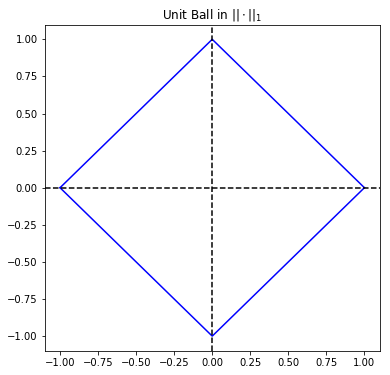

In [114]:
norm_1 = lambda x: 1-abs(x)
plotUnitBall(norm_1, "$||\cdot||_{1}$");

###### Norm ${\left\lVert \cdot\right\rVert}_{2}$
For ${\left\lVert \cdot\right\rVert}_{2} = \sqrt{{\vert x\vert}^{2} + {\vert y \vert}^{2}}$ for $x,y \in \mathbb{R}^{2}$

On the interval on $x,y \in [-1,1]$ we will have a circle with radius 1. This is clear because of the definition of the ${\left\lVert \cdot\right\rVert}_{2}$ norm. Where we get the familiar equation of a circle as: 
$$\sqrt{x^2 + y^2}= 1 \implies x^2 + y^2 = 1$$
So clearly the unit ball in this norm has to be a circle.

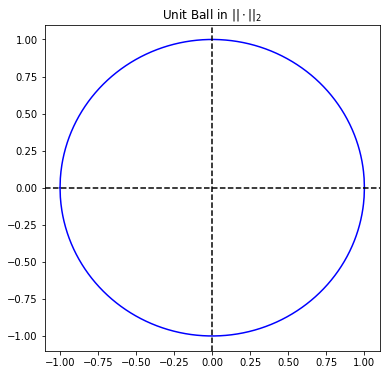

In [115]:
norm_2 = lambda x: np.sqrt(1-abs(x)**2)
plotUnitBall(norm_2, "$||\cdot||_{2}$");

###### Norm ${\left\lVert \cdot\right\rVert}_{\infty}$
For ${\left\lVert \cdot\right\rVert}_{\infty} = \max{\left\{\vert x\vert,\vert y\vert\right\}}$ for $x,y \in \mathbb{R}^{2}$

On the interval on $x,y \in [-1,1]$ we will have a square due to the "conditional" nature of the maximum. When $\max{\left\{\vert x\vert,\vert y\vert\right\}}=1$ then we have that either $x = 1$ or $y = 1$. Which gives the square shape.

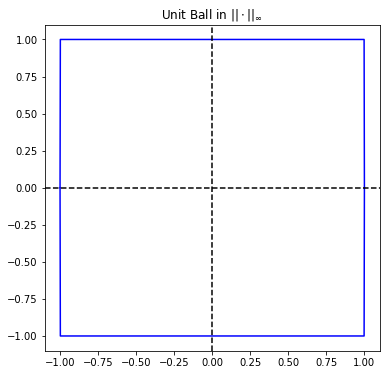

In [116]:
norm_inf = lambda x: np.where(abs(x) < 1, 1, 0)
plotUnitBall(norm_inf, "$||\cdot||_{\infty}$");

___

## Problem 3:
We say that a sequence of functions $\{f_{n}\}$ defined on $[a,b]$ converges uniformly to a function $f$ if for each $\epsilon \gt 0$, there is an $N$, which depends only on $\epsilon$ and $[a,b]$ but is independent of $x$, such that
$$\left\vert f_{n}(x) - f(x)\right\vert \lt \epsilon \text{, if } n \gt N \text{, for all } x \in [a,b] \mathrm{.}$$

Define the sequence of numbers $M_{n} = {\left\lVert f_{n}-f\right\rVert}_{\infty}$. Prove that $\left\{f_{n}\right\}$ converges uniformly to $f$ in $[a,b]$ if and only if $M_{n} \rightarrow 0$ as $n \rightarrow \infty$.

##### Solution:
**Firstly I will prove in the "$\implies$" direction.**

We want to show that if $\left\{f_{n}\right\}$ converges uniformly to $f$ in $[a,b]$ then  $M_{n} \rightarrow 0$ as $n \rightarrow \infty$.

*Proof*:
If $\left\{f_{n}\right\}$ converges uniformly to $f$ in $[a,b]$ then we have: 
$$\left\vert f_{n}(x) - f(x)\right\vert \lt \epsilon \text{, if } n \gt N \text{, for all } x \in [a,b] \mathrm{.}$$
Additionally, by definition of the ${\lVert\cdot\rVert}_{\infty}$ norm, we have:
$${\lVert f_{n}(x) - f(x) \rVert}_{\infty} = \sup_{x\in[a,b]}{\lvert f_{n}(x) - f(x)\rvert}$$
Thus, by definition of the supremum, and the uniform convergence, we have: 
$${\lVert f_{n}(x) - f(x) \rVert}_{\infty} \leq \epsilon \text{, if } n \gt N \text{, for all } x \in [a,b] \mathrm{.}$$
Now let $M_{n} = {\left\lVert f_{n}-f\right\rVert}_{\infty}$, so we now have: 
$$M_{n} = {\lVert f_{n}(x) - f(x) \rVert}_{\infty} \leq \epsilon \text{, if } n \gt N \text{, for all } x \in [a,b] \mathrm{.}$$
So clearly $M_{n}$ converges to $0$ as $n \rightarrow \infty$ by the definition of convergence applied to $M_{n}$. 

**Next, I will now show the "$\impliedby$" direction.**

We want to show that if $M_{n} \rightarrow 0$ as $n \rightarrow \infty$ then $\left\{f_{n}\right\}$ converges uniformly to $f$ in $[a,b]$.

*Proof*:
If $M_{n} \rightarrow 0$ as $n \rightarrow \infty$ where $M_{n} = {\left\lVert f_{n}-f\right\rVert}_{\infty}$. Then by definition of convergence we have that for any $\epsilon \gt 0$ there is an $N$ so that: 
$$M_{n} = {\left\lVert f_{n}-f\right\rVert}_{\infty} \lt \epsilon \text{ for any } n \gt N$$
We then have by definition of the ${\lVert\cdot\rVert}_{\infty}$ norm that:
$$M_{n} = {\lvert f_{n}(x) - f(x)\rvert}\lt \epsilon \text{ if } n \gt N \text{, for all } x \in [a,b]$$
which is the definition of uniform convergence.

Thus since $M_{n}$ converges, then $\{f_{n}\}$ converges to $f$.

We have now shown both directions to be true. **QED**

___

## Problem 4:
### Part (a)
Prove that the sequence of functions given by 
$$f_{n}(x) = \left(\frac{n-1}{n}\right)x^{2}+\frac{1}{n}x\text{, for } 0\leq x\leq 1$$
converges uniformly to $f(x) = x^{2}$ in $[0,1]$.

##### Solution:
Let $M_{n} = {\lVert f_{n} - f\rVert}_{\infty}$

Thus we have $M_{n} = \sup_{x\in[0,1]}{\lvert f_{n}(x) - f(x)\rvert}$.

After plugging in the functions we have:
$$M_{n} = \sup_{x\in[0,1]}{\left\lvert\left(\frac{n-1}{n}\right)x^{2}+\frac{1}{n}x - x^{2}\right\rvert} = \sup_{x\in[0,1]}\left\lvert \frac{1}{n}x - \frac{1}{n}x^{2}\right\rvert = \sup_{x\in[0,1]}\left\lvert \frac{1}{n}\left(x -x^{2}\right)\right\rvert$$

We observe $M_{n}$ to be a concave function with its maximum function value to lie at $x=\frac{1}{2}$.

Thus by plugging in $x=\frac{1}{2}$, we have:

$M_{n} = \lvert f_{n}\left(\frac{1}{2}\right) - f\left(\frac{1}{2}\right)\rvert$. Which after plugging in function values is:
$$M_{n} = \left\lvert \frac{1}{n}\left(\frac{1}{2}-\frac{1}{4}\right)\right\rvert = \frac{1}{4n}$$

Finally, we have $\lim_{n\rightarrow \infty}M_{n}=\lim_{n\rightarrow \infty}\frac{1}{4n} = 0$
Thus $M_{n}\rightarrow 0$ as $n \rightarrow \infty$ which we proved in problem 3 implies that $\{f_{n}(x)\}$ converges uniformly to $f$.

## Problem 4:
### Part (b)
Does the sequence $f_{n}(x) = x^{n}$ defined in $[0,1)$ converge uniformly?

##### Solution:
To show that this function converges, we again use $M_{n} = \sup_{x\in[0,1)}{\lvert f_{n}(x) - f(x)\rvert}$ or the $\rVert\cdot\lVert_{\infty}$ norm.

Plugging in the functions gives us:
$$M_{n} = \sup_{x\in[0,1)}{\lvert x^{n} - x^{2}\rvert}$$

To find the supremum, we find the $x$ that maximizes $M_{n}$ based on $n$. By taking the derivative and solving for x we have the function to be maximized at $x = \sqrt[n-2]{\frac{2}{n}}$ on $[0,1)$.

Then plugging in the value for x:

$$M_{n} = \left\lvert\left(\sqrt[n-2]{\frac{2}{n}}\right)^{n} - \left(\sqrt[n-2]{\frac{2}{n}}\right)^{2}\right\rvert$$

We have that $\lim_{n\rightarrow \infty}M_{n}=1$, so $M_{n}$ does not converge to $0$ as $n \rightarrow \infty$, therefore by the contrapositive of the statement we proved in part b, $f_{n}(x) = x^{n}$ does **not** converge uniformly to $f(x)=x^{2}$.

___

## Problem 5
Let

$$
f(x) = \begin{cases}
x & \text{for } 0 \lt x\leq \frac{1}{2}\\
1-x & \text{for } \frac{1}{2} \lt x \leq 1\\
\end{cases}
$$

Write a code to construct the corresponding Bernstein polynomials to estimate the rate of convergence of $B_{n}f$ to $f$.

##### Solution:
Firstly we define the corresponding piecewise function $f$.

In [125]:
def f(x):
    assert 0<= x <=1
    return x if x <= 1/2 else 1-x

Next the function that calculates the Bernstein Polynomial at value $n$ and $x$, $B_{n}f(x)$.

In [226]:
def B_n(f,x,n):
    from scipy import special as sp
    b = lambda k: f(k/n)*sp.comb(n,k)*(x**k)*((1-x)**(n-k))
    return np.sum([b(k) for k in range(0,n+1)])

Next, we can define a function that tests different values of $n$ for a function value and prints out function values.

In [256]:
def testBernstein(f,x,n_list):
    calcRatio = lambda n1,n2: (
        np.abs(x - B_n(f,x,n2))/np.abs(x - B_n(f, x, n1))
    )
    print("Report for x = {}:".format(x))
    for n in n_list:
        print(
            "The decrease factor from {} to {} is {}".
            format(n,n*2,calcRatio(n,n*2))
        )

test_x_vals = np.arange(0.1, 0.9, 0.1)
test_n_vals = [2**k for k in range(10)]

for x in test_x_vals:
    testBernstein(f,x,test_n_vals)

Report for x = 0.1:
The decrease factor from 1 to 2 is 0.09999999999999995
The decrease factor from 2 to 4 is 0.18999999999999997
The decrease factor from 4 to 8 is 0.059973684210519865
The decrease factor from 8 to 16 is 0.007026367609116671
The decrease factor from 16 to 32 is 0.00011004487929816333
The decrease factor from 32 to 64 is 1.8901072730382814e-06
The decrease factor from 64 to 128 is 2.1666666666666665
The decrease factor from 128 to 256 is 23.46153846153846
The decrease factor from 256 to 512 is 0.839344262295082
The decrease factor from 512 to 1024 is 4.45703125
Report for x = 0.2:
The decrease factor from 1 to 2 is 0.1999999999999999
The decrease factor from 2 to 4 is 0.3599999999999987
The decrease factor from 4 to 8 is 0.2035555555555522
The decrease factor from 8 to 16 is 0.07504149463750304
The decrease factor from 16 to 32 is 0.011578880387355942
The decrease factor from 32 to 64 is 0.00030671448954113536
The decrease factor from 64 to 128 is 1.5278154796843179e-0

As seen above, it seems that the rate of convergence changes on the value of x we choose to focus on in addition to the value of n.

___

## Problem 6
Generate your own version of the integral sign
$$\int$$
by using a composite, quadratic Bézier curve (using code). Make sure the curve is $C^{1}$

##### Solution:
Below I write my code to graph the integral sign.

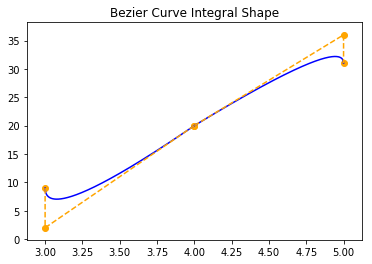

In [366]:
def Bez(t, points):
    from scipy import special as sp
    n = len(points)-1
    b = lambda k: sp.comb(n,k)*(t**k)*((1-t)**(n-k))
    return np.sum([point*b(k) for k, point in enumerate(points)], axis=0)

# Unnests arrays of points
def listSplit(l):
    l_zip = list(map(list, zip(*l)))
    return (l_zip[0], l_zip[1])

t_points = np.linspace(0,1, 1000)
points_1 = [np.array([3,9]), np.array([3,2]), np.array([4,20])]
points_2 = [np.array([4,20]), np.array([5,36]), np.array([5,31])]

bez_1_x, bez_1_y = listSplit([Bez(t, points_1) for t in t_points])
bez_2_x, bez_2_y = listSplit([Bez(t, points_2) for t in t_points])

points_1_x, points_1_y = listSplit(points_1)
points_2_x, points_2_y = listSplit(points_2)

plt.plot(bez_1_x, bez_1_y, color="blue")
plt.plot(bez_2_x, bez_2_y, color="blue")
plt.scatter(points_1_x, points_1_y, color = "orange")
plt.plot(points_1_x, points_1_y, color = "orange", linestyle="--")
plt.scatter(points_2_x, points_2_y, color = "orange")
plt.plot(points_2_x, points_2_y, color = "orange", linestyle="--")

plt.title("Bezier Curve Integral Shape");